In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
os.chdir("C:\\Users\\Thispc\\Downloads")

In [3]:
df = pd.read_csv("file.csv",encoding='utf-8')

In [4]:
df['abstract']

0          OBJECTIVE: This retrospective chart review des...
1          Inflammatory diseases of the respiratory tract...
2          Surfactant protein-D (SP-D) participates in th...
3          Endothelin-1 (ET-1) is a 21 amino acid peptide...
4          Respiratory syncytial virus (RSV) and pneumoni...
                                 ...                        
1056655    2019-nCoV, which is a novel coronavirus emerge...
1056656    Microbiology laboratories have traditionally r...
1056657    To present a patient with bilateral conjunctiv...
1056658    Given COVID-19 pandemic periodic outpatient as...
1056659    OBJECTIVE: To examine interhospital variation ...
Name: abstract, Length: 1056660, dtype: object

In [5]:
df = df[df['abstract'].notnull()]


In [6]:
df1=df.head(10000)

In [7]:
text = " ".join(cat.split()[0] for cat in df1['abstract'])

In [8]:
text

"OBJECTIVE: Inflammatory Surfactant Endothelin-1 Respiratory Nidovirus Recent The Heme This Regulation Heterogeneous The We There INTRODUCTION: BACKGROUND: BACKGROUND: BACKGROUND: In Lactococcus Horizontal Although Using BACKGROUND: Viral mRNA Although While The In GIDEON This In At BACKGROUND: The Sequencing BACKGROUND: BACKGROUND: BACKGROUND The BACKGROUND: BACKGROUND: Illicit Neutralization BACKGROUND: BACKGROUND: The BACKGROUND: BACKGROUND: The BACKGROUND: BACKGROUND: Ventilator BACKGROUND: Live-virus RNA Electrochemical BACKGROUND: BACKGROUND: BACKGROUND: Programmed The Viruses BACKGROUND: In There Accuracy Here BACKGROUND: INTRODUCTION: The BACKGROUND: BACKGROUND: Prophylaxis BACKGROUND: Inflammation Cognitive Protein Understanding BACKGROUND: BACKGROUND: Social BACKGROUND: A The BACKGROUND: Despite Pneumonia BACKGROUND: BACKGROUND: The BACKGROUND: The To Influenza BACKGROUND: Over Reproduction Understanding We The BACKGROUND: Predicting Arginine-rich We've The Aberrant The The B

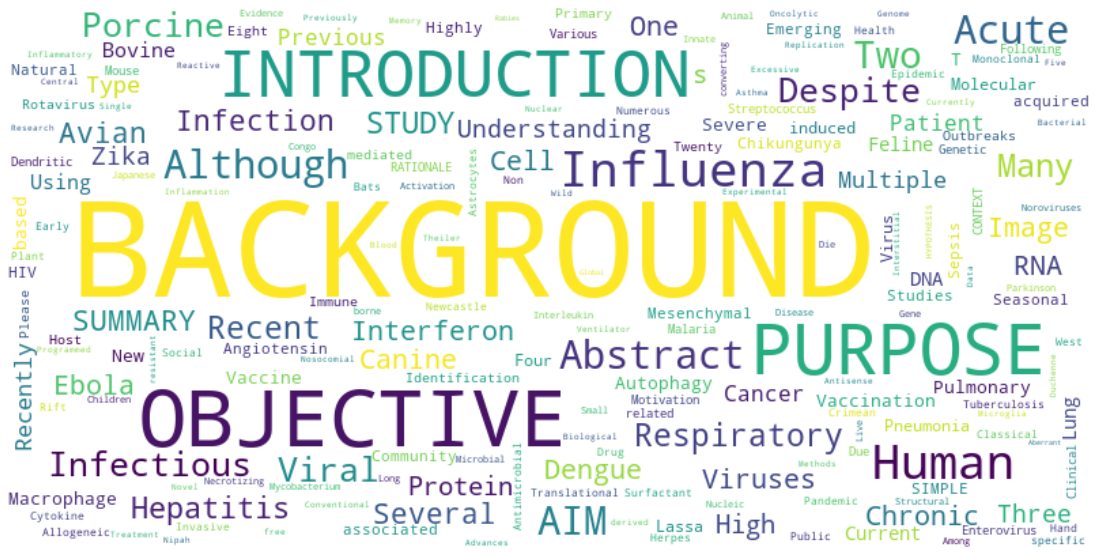

In [18]:
word_cloud = WordCloud(width=800, height=400,collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
df1=df.iloc[10000:20000]

In [22]:
df1

,Unnamed: 0,abstract
12942,12942,BACKGROUND: Pseudo-pulseless electrical activi...
12943,12943,Epidemiological surveillance of Shigella spp. ...
12944,12944,PURPOSE: We hypothesized that neurally adjuste...
12945,12945,INTRODUCTION: Proper insulin injection techniq...
12946,12946,Although mechanical ventilation is a lifesavin...
...,...,...
25172,25172,Establishing an RNA-associated interaction rep...
25173,25173,The success of protein engineering and design ...
25174,25174,Liquid–liquid phase separation (LLPS) is criti...
25175,25175,Transcriptomic profiling is critical to uncove...


In [20]:
text = " ".join(cat.split()[0] for cat in df1['abstract'])

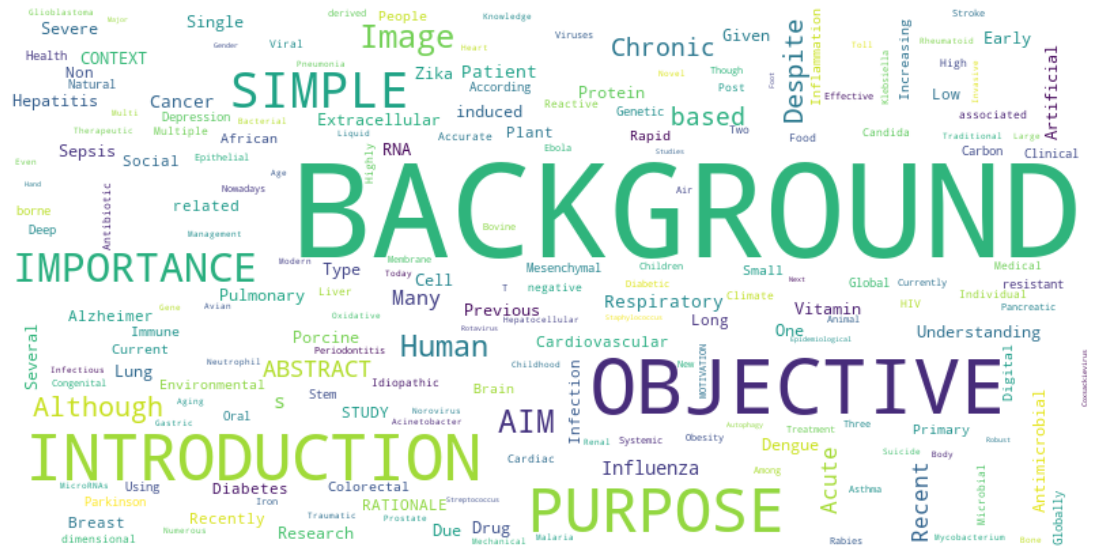

In [21]:
word_cloud = WordCloud(width=800, height=400,collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
df2=df.iloc[20000:40000]

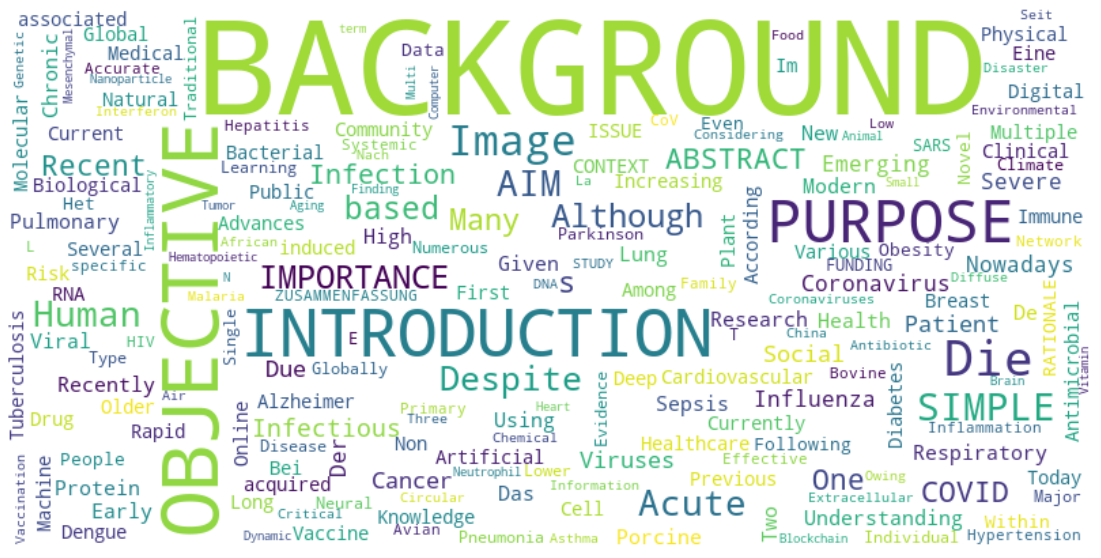

In [24]:
text = " ".join(cat.split()[0] for cat in df2['abstract'])
word_cloud = WordCloud(width=800, height=400,collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
df3=df.iloc[40000:60000]

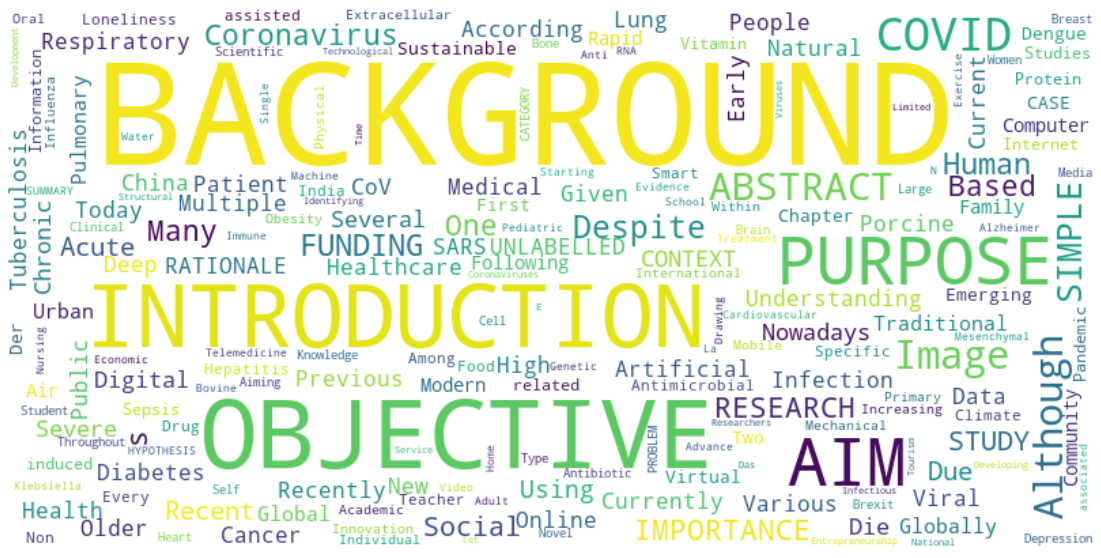

In [27]:
text = " ".join(cat.split()[0] for cat in df3['abstract'])
word_cloud = WordCloud(width=800, height=400,collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

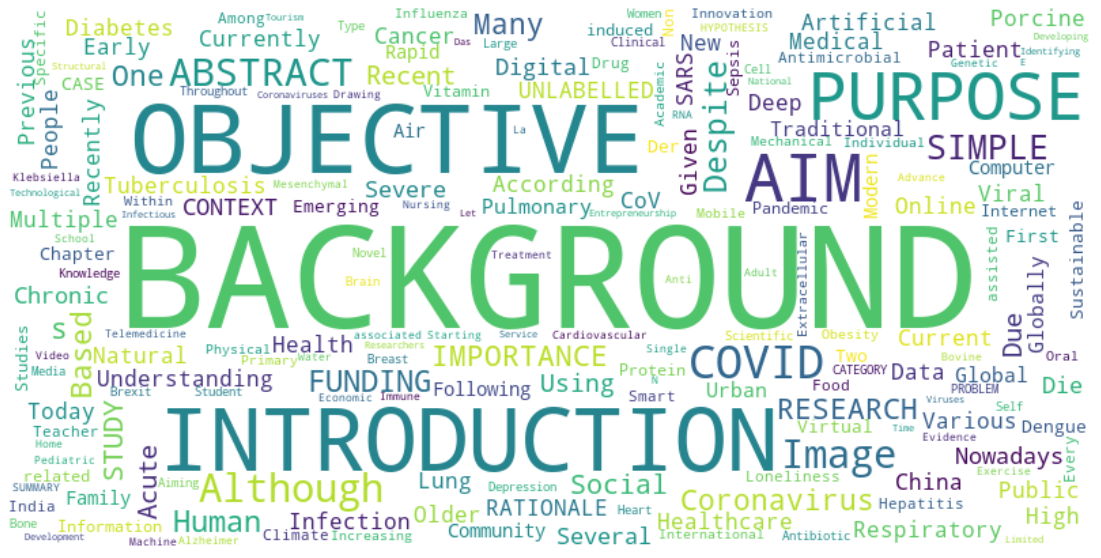

In [28]:
df4=df.iloc[40000:60000]
text = " ".join(cat.split()[0] for cat in df4['abstract'])
word_cloud = WordCloud(width=800, height=400,collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
df['abstract'].to_csv('data.txt', sep='\t')

In [10]:
import heapq
summary_sentences = heapq.nlargest(7, text)

summary = ' '.join(summary_sentences)
print(summary)

□ □ □ − ′ ′ •


In [12]:
import pandas as pd
import numpy as np
data = text
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords



In [15]:
def solve(text):
    stopwords1 = set(stopwords.words("english"))
    words = word_tokenize(text)
    freqTable = {}
    for word in words:
        word = word.lower()
        if word in stopwords1:
            continue
    if word in freqTable:
        freqTable[word] += 1
    else :
        freqTable[word] = 1

    sentences = sent_tokenize(text)
    sentenceValue = {}
    for sentence in sentences:
        for word, freq in freqTable.items():
            if word in sentence.lower():
                if sentence in sentenceValue:
                    sentenceValue[sentence] += freq
                else :
                    sentenceValue[sentence] = freq
                    sumValues = 0
                for sentence in sentenceValue:
                    sumValues += sentenceValue[sentence]
                    average = int(sumValues / len(sentenceValue))
                    summary = ''
            for sentence in sentences:
                if (sentence in sentenceValue) and(sentenceValue[sentence] > (1.2 * average)):
                    summary += "" + sentence
    return summary

In [19]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

# Creating text parser using tokenization
parser = PlaintextParser.from_string(text, Tokenizer("english"))

from sumy.summarizers.text_rank import TextRankSummarizer

# Summarize using sumy TextRank
summarizer = TextRankSummarizer()
summary = summarizer(parser.document, 2)

text_summary = ""
for sentence in summary:
    text_summary += str(sentence)

print(text_summary)

Artificial Nonsense-mediated Background: BACKGROUND: The Singapore The Chikungunya BACKGROUND: Aims: Given BACKGROUND: A Glycosylation The Current BACKGROUND: BACKGROUND: Viral Methicillin-resistant BACKGROUND: In Background: Type Rickettsiae Plasmacytoid The BACKGROUND: The Flaviviruses Olive BACKGROUND: BACKGROUND: AIM: Dengue BACKGROUND: BACKGROUND: BACKGROUND: The BACKGROUND: Reactive Early BACKGROUND: Lassa Health From Glucose-6-phosphate Gynecological Ebola Hepatitis The Hepatitis Advances We In Recent Shigella Serving BACKGROUND: BACKGROUND: Infusion Chloroquine In Circular BACKGROUND: The BACKGROUND: Apoptosis Eight The Acute Interferon-induced Many BACKGROUND: To BACKGROUND: While Chikungunya Memory BACKGROUND: Basal Recent Post-translational To Sublingual BACKGROUND: A East BACKGROUND: Healthcare In INTRODUCTION: Camels Zika The Many The Bronchial Checkpoint BACKGROUND: BACKGROUND: Understanding Macromolecular Data BACKGROUND: Cellular BACKGROUND: When [Image: Membrane The PU

In [27]:
len(text_summary)
text_summary

"Artificial Nonsense-mediated Background: BACKGROUND: The Singapore The Chikungunya BACKGROUND: Aims: Given BACKGROUND: A Glycosylation The Current BACKGROUND: BACKGROUND: Viral Methicillin-resistant BACKGROUND: In Background: Type Rickettsiae Plasmacytoid The BACKGROUND: The Flaviviruses Olive BACKGROUND: BACKGROUND: AIM: Dengue BACKGROUND: BACKGROUND: BACKGROUND: The BACKGROUND: Reactive Early BACKGROUND: Lassa Health From Glucose-6-phosphate Gynecological Ebola Hepatitis The Hepatitis Advances We In Recent Shigella Serving BACKGROUND: BACKGROUND: Infusion Chloroquine In Circular BACKGROUND: The BACKGROUND: Apoptosis Eight The Acute Interferon-induced Many BACKGROUND: To BACKGROUND: While Chikungunya Memory BACKGROUND: Basal Recent Post-translational To Sublingual BACKGROUND: A East BACKGROUND: Healthcare In INTRODUCTION: Camels Zika The Many The Bronchial Checkpoint BACKGROUND: BACKGROUND: Understanding Macromolecular Data BACKGROUND: Cellular BACKGROUND: When [Image: Membrane The P

In [20]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
def sumy_method(text):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LexRankSummarizer()
    #Summarize the document with 2 sentences
    summary = summarizer(parser.document, 2)
    dp = []
    for i in summary:
        lp = str(i)
        dp.append(lp)
        final_sentence = ' '.join(dp)
    return final_sentence

In [28]:
n=sumy_method(data)
n

"The Viruses Little To BACKGROUND: Extensive The H9N2 The Orthobunyaviruses Secreted This Stress An BACKGROUND: BACKGROUND: Classical The Enteroviruses OBJECTIVES: A We The BACKGROUND: Sudan BACKGROUND: New Vaccines A BACKGROUND: Cassiae The In-vitro BACKGROUND: The BACKGROUND: Severe Venezuelan Lethal A Yellow Modified Laryngeal Severe OBJECTIVES: To Asthmatic In The Precise Much BACKGROUND: Diarrheal We H1N1 The Lambda Current Grouper BACKGROUND: BRIL Ebola Pseudomonas Being BACKGROUND: Rubella After It BACKGROUND: Shigellosis, Hepatitis The Salivary Survival Highly Respiratory We BACKGROUND: The Glycyrrhetinic Following Type A Influenza We INTRODUCTION: Hepatitis Unlike This The Macroautophagy/autophagy Alcohol-based Many Japanese A Na/K-ATPase The Feline Effector The BACKGROUND: Bid, The In INTRODUCTION: Infection Leukemia/lymphoma‐related BACKGROUND: Appropriate Interferon‐induced Ten Autoimmune MicroRNA-21 The The The High Rationale: Mucosal OATP1B1 Exacerbation BACKGROUND: Prost

In [24]:
len(n)

16746

In [25]:
len(data)

83048